In [1]:
# 라이브러리 호출
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
# MAT 파일 불러오기
mat_path = r"../HW3_package/hw3_prob1a.mat"
mat_data = scipy.io.loadmat(mat_path)

# 변수 할당
A = mat_data['A']
b = mat_data['b']
x_orig = mat_data['x_orig']

In [3]:
def g(x):
    return (np.linalg.norm((A @ x - b), 2) ** 2)

def h(x):
    return lambda_v * np.linalg.norm(x, 1)

def f(x):
    return (g(x) + h(x))/2

def grad_g(x):
    return A.T @ (A @ x - b)

In [4]:
# ISTA
ista_x = np.zeros((A.shape[1], 1))

lambda_v = 2
# t = 1/L 
t =  1/ np.linalg.norm(A, 2) ** 2
stopping_point = 1e-4

arr_ista = []

while True:
    x_minus1 = ista_x
    # step 1. consider g(x)  
    g_x = ista_x - t * grad_g(ista_x)
    # step 2. soft thresholding
    ista_x = np.sign(g_x) * np.maximum(np.abs(g_x) - lambda_v * t, 0)


    arr_ista.append(np.linalg.norm(ista_x - x_orig))
    
    # break check 
    if  (np.linalg.norm((ista_x - x_minus1), 2) / np.linalg.norm(ista_x, 2)) < stopping_point:
        break  


In [5]:
# FISTA
fista_x = np.zeros((A.shape[1], 1))
y = fista_x

lambda_v = 2
# t = 1/L 
t =  1/ np.linalg.norm(A, 2) ** 2
stopping_point = 1e-4

arr_fista = []
for iter in range(100000):
    
    x_minus1 = fista_x

    # step 1. consider g(x)  
    g_x = y - t * grad_g(y)
    
    # step 2. soft thresholding
    fista_x = np.sign(g_x) * np.maximum(np.abs(g_x) - lambda_v * t, 0)

    arr_fista.append(np.linalg.norm(fista_x - x_orig))
    
    # break check
    # +) iter가 0일 때, norm의 값이 1이 되고, 1일 때 norm의 값이 0되기 떄문에 
    #    iter가 2인 지점부터 break를 확인해야함.
    if  (np.linalg.norm((fista_x - x_minus1), 2) / np.linalg.norm(fista_x, 2)) < stopping_point and iter > 1:
        break    
    
    # y_k1 = x_k1 + (k / k + 3) * (x_k1 - x_k) 
    if iter >= 1:
        y = fista_x + (iter / (iter + 3) * (fista_x - x_minus1))


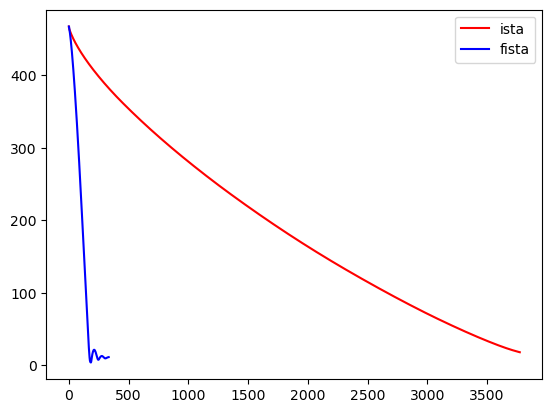

In [6]:
plt.plot(arr_ista, 'r',label = "ista")
plt.plot(arr_fista, 'b', label = "fista")
plt.legend() 
plt.show()